# Lepton-Jet Isolation Study
### In signal processes, lepton-jets are produced with little activity nearby. 
### Therefore, a requirement on the lepton-jet isolation can distinguish lepton-jets in signal events from lepton-jets produced by hadronic jets in background events. 
### The lepton-jet isolation is defined as $\frac{E_{Matched-Jet}}{E_{Lepton-Jet}}$ X (1 - Lepton Fraction of Matched Jet).

#### In this notebook, I'll check the LJ isolation varies with decay length and bound state mass. 
#### I'll also separate the basic LJ into Mu, EGM-type LJ, and more specific LJ as well (PF Muon, DSA Muon, Electron, and Photon)

In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
# sidm_path = str(sys.path[0]).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, cutflow
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
from tqdm.notebook import tqdm
import coffea.util

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

Connection method: Direct,
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,
Comm: tls://192.168.235.25:8786,Workers: 0
Dashboard: /user/dongyub.lee@cern.ch/proxy/8787/status,Total threads: 0
Started: 9 minutes ago,Total memory: 0 B


In [3]:
samples = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",  

    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
]

In [4]:
fileset = utilities.make_fileset(samples[:7], 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                 max_files = -1,
                                )

fileset = utilities.make_fileset(samples[7:14], 
                                 "llpNanoAOD_v2",
                                 location_cfg="signal_4mu_v10.yaml",
                                fileset=fileset,
                                max_files = -1, 
                                #max_files =1, 
                                )

In [5]:
runner = processor.Runner(
    executor=processor.DaskExecutor(client=client),
    # executor=processor.IterativeExecutor(),
    # executor=processor.FuturesExecutor(), 
    schema=NanoAODSchema,
#    maxchunks=10, 
    skipbadfiles=True
)

channels = [
    "base",
]

p = sidm_processor.SidmProcessor(
    channels,
    ["base"],
    lj_reco_choices=["0.4"],
    unweighted_hist=False,
)

import coffea.util as coffea_util
coffea_util.save(p, "processor.coffea")
print(coffea_util.load("processor.coffea"))
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset, treename="Events", processor_instance=p)

out = output["out"]

Signal not in xs cfg, assuming 1fb#######] | 100% Completed | 11min 58.9s
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [6]:
samples_bkg = [
    "DYJetsToMuMu_M10to50",
    "DYJetsToMuMu_M50",
    "TTJets",
    "QCD_Pt15To20",
    "QCD_Pt20To30",
    "QCD_Pt30To50",
    "QCD_Pt50To80",
    "QCD_Pt80To120",
    "QCD_Pt120To170",
    "QCD_Pt170To300",
    "QCD_Pt300To470",
    "QCD_Pt470To600",
    "QCD_Pt600To800",
    "QCD_Pt800To1000",
    "QCD_Pt1000",
]

In [16]:
fileset_DYJetsToMuMu_M10to50 = utilities.make_fileset(samples_bkg[:1], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = -1)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_DYJetsToMuMu_M10to50, treename="Events", processor_instance=p)
out_file_name = "output_" + "DYJetsToMuMu_M10to50" + ".coffea"
coffea.util.save(output,out_file_name)
out['DYJetsToMuMu_M10to50'] = output["out"]['DYJetsToMuMu_M10to50']

[########################################] | 100% Completed |  7min 32.3s

In [7]:
fileset_DYJetsToMuMu_M50 = utilities.make_fileset(samples_bkg[1:2], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_DYJetsToMuMu_M50, treename="Events", processor_instance=p)
out_file_name = "output_" + "DYJetsToMuMu_M50" + ".coffea"
coffea.util.save(output,out_file_name)
out['DYJetsToMuMu_M50'] = output["out"]['DYJetsToMuMu_M50']

[########################################] | 100% Completed |  1hr  1min 38.0s

In [8]:
fileset_TTJets = utilities.make_fileset(samples_bkg[2:3], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = -1)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_TTJets, treename="Events", processor_instance=p)
out_file_name = "output_" + "TTJets" + ".coffea"
coffea.util.save(output,out_file_name)
out['TTJets'] = output["out"]['TTJets']

[########################################] | 100% Completed |  6min 19.7s

NameError: name 'out' is not defined

In [9]:
fileset_QCD_Pt15To20 = utilities.make_fileset(samples_bkg[3:4], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt15To20, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt15To20" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt15To20'] = output["out"]['QCD_Pt15To20']

[########################################] | 100% Completed |  2min 15.0s

In [10]:
fileset_QCD_Pt20To30 = utilities.make_fileset(samples_bkg[4:5], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt20To30, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt20To30" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt20To30'] = output["out"]['QCD_Pt20To30']

[########################################] | 100% Completed |  7min 14.0s

In [11]:
fileset_QCD_Pt30To50 = utilities.make_fileset(samples_bkg[5:6], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt30To50, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt30To50" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt30To50'] = output["out"]['QCD_Pt30To50']

[########################################] | 100% Completed |  7min 41.7s

In [12]:
fileset_QCD_Pt50To80 = utilities.make_fileset(samples_bkg[6:7], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt50To80, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt50To80" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt50To80'] = output["out"]['QCD_Pt50To80']

[########################################] | 100% Completed |  7min 42.4s

In [13]:
fileset_QCD_Pt80To120 = utilities.make_fileset(samples_bkg[7:8], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt80To120, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt80To120" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt80To120'] = output["out"]['QCD_Pt80To120']

[########################################] | 100% Completed |  9min 38.7s

In [5]:
fileset_QCD_Pt120To170 = utilities.make_fileset(samples_bkg[8:9], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt120To170, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt120To170" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt120To170'] = output["out"]['QCD_Pt120To170']

[########################################] | 100% Completed | 12min 17.4s

In [6]:
fileset_QCD_Pt170To300 = utilities.make_fileset(samples_bkg[9:10], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt170To300, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt170To300" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt170To300'] = output["out"]['QCD_Pt170To300']

[########################################] | 100% Completed | 13min  2.9s

In [7]:
fileset_QCD_Pt300To470 = utilities.make_fileset(samples_bkg[10:11], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt300To470, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt300To470" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt300To470'] = output["out"]['QCD_Pt300To470']

[########################################] | 100% Completed | 15min  2.0s

In [8]:
fileset_QCD_Pt470To600 = utilities.make_fileset(samples_bkg[11:12], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt470To600, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt470To600" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt470To600'] = output["out"]['QCD_Pt470To600']

[########################################] | 100% Completed | 14min 42.8s

In [9]:
fileset_QCD_Pt600To800 = utilities.make_fileset(samples_bkg[12:13], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt600To800, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt600To800" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt600To800'] = output["out"]['QCD_Pt600To800']

[########################################] | 100% Completed | 18min 13.7s

In [10]:
fileset_QCD_Pt800To1000 = utilities.make_fileset(samples_bkg[13:14], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt800To1000, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt800To1000" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt800To1000'] = output["out"]['QCD_Pt800To1000']

[########################################] | 100% Completed | 14min 14.7s

In [5]:
fileset_QCD_Pt1000 = utilities.make_fileset(samples_bkg[14:15], "skimmed_llpNanoAOD_v2", location_cfg="backgrounds.yaml", max_files = 1500)
with performance_report(filename="dask-report.html"):
    output = runner.run(fileset_QCD_Pt1000, treename="Events", processor_instance=p)
out_file_name = "output_" + "QCD_Pt1000" + ".coffea"
coffea.util.save(output,out_file_name)
out['QCD_Pt1000'] = output["out"]['QCD_Pt1000']

[########################################] | 100% Completed | 12min 50.2s

In [7]:
#First check if there is already an out dictionary
try:
    out
    print("The _out_ dictionary already exists; will use what is saved in memory if possible")
except NameError:
    print("WARNING! No processor output stored in the kernel's memory. Will try to load pickled coffea file for each sample instead")
    out = {}

#For each sample, try to use the data in memory if possible; if not try to load the file
#If those both fail, then raise an error and skip it
for sample in samples_bkg:
    if sample in out:
        print(f"{sample} already found in memory; not loading file")
    else:
        print(f"Loading file for sample {sample}")
        filename = "output_" + sample + ".coffea"
        try: 
            output = coffea.util.load(filename)
            print("Successfully opened file")        
            out[sample] = output["out"][sample]
        except FileNotFoundError:
            print("**** ERROR! File not found. Check the file name, or run the processor again and save the output to a pickle file using coffea.util.save")

The _out_ dictionary already exists; will use what is saved in memory if possible
Loading file for sample DYJetsToMuMu_M10to50
Successfully opened file
Loading file for sample DYJetsToMuMu_M50
Successfully opened file
Loading file for sample TTJets
Successfully opened file
Loading file for sample QCD_Pt15To20
Successfully opened file
Loading file for sample QCD_Pt20To30
Successfully opened file
Loading file for sample QCD_Pt30To50
Successfully opened file
Loading file for sample QCD_Pt50To80
Successfully opened file
Loading file for sample QCD_Pt80To120
Successfully opened file
Loading file for sample QCD_Pt120To170
Successfully opened file
Loading file for sample QCD_Pt170To300
Successfully opened file
Loading file for sample QCD_Pt300To470
Successfully opened file
Loading file for sample QCD_Pt470To600
Successfully opened file
Loading file for sample QCD_Pt600To800
Successfully opened file
Loading file for sample QCD_Pt800To1000
Successfully opened file
Loading file for sample QCD_Pt

In [10]:
for sample in samples:
    print(sample)
    print(out[sample]['cutflow']['base'].print_table(unweighted=False))
    print("")

2Mu2E_100GeV_5p0GeV_0p4mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                 4.8          4.8
PV filter                    59.8          4.8
>=2 LJs                      39.3          3.5
None

2Mu2E_150GeV_5p0GeV_0p27mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                12.6         12.6
PV filter                    59.8         12.6
>=2 LJs                      49.9         11.4
None

2Mu2E_200GeV_5p0GeV_0p2mm
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection                 59.8         59.8
pass triggers                17.4         17.4
PV filter                    59.8         17.4
>=2 LJs                      52.2         16.2
None

2Mu2E_500GeV_5p0GeV_0p08mm
cut name         individual cu

In [23]:
for sample in samples_bkg:
    print(sample)
    print(out[sample]['cutflow']['base'].print_table(unweighted=True))
    print("")

DYJetsToMuMu_M10to50
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection             121975.0     121975.0
pass triggers             15166.0      15166.0
PV filter                121975.0      15166.0
>=2 LJs                      59.0         28.0
None

DYJetsToMuMu_M50
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection           26933976.0   26933976.0
pass triggers          13668001.0   13668001.0
PV filter              26933968.0   13667998.0
>=2 LJs                    1091.0        388.0
None

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            2483395.0    2483395.0
pass triggers            158987.0     158987.0
PV filter               2482384.0     158935.0
>=2 LJs                   91580.0       1534.0
None

QCD_Pt15To20
cut name         individual cut N    all cut N
-------------  ----------------

In [9]:
for sample in samples_bkg:
    print(sample)
    print(out[sample]['cutflow']['base'].print_table(unweighted=False))
    print("")

DYJetsToMuMu_M10to50
cut name         individual cut N      all cut N
-------------  ------------------  -------------
No selection        51859193271.5  51859193271.5
pass triggers        6250511330.9   6250511330.9
PV filter           51859193271.5   6250511330.9
>=2 LJs                25358424.5     12034505.7
None

DYJetsToMuMu_M50
cut name         individual cut N       all cut N
-------------  ------------------  --------------
No selection       146226330654.8  146226330654.8
pass triggers       75407685263.3   75407685263.3
PV filter          146226294696.8   75407676273.8
>=2 LJs                 6335245.1       2313979.0
None

TTJets
cut name         individual cut N    all cut N
-------------  ------------------  -----------
No selection            7750728.3    7750728.3
pass triggers            496221.5     496221.5
PV filter               7748222.5     496081.1
>=2 LJs                  285831.5       4788.0
None

QCD_Pt15To20
cut name         individual cut N    all cut N
-

## Let's start with decay length dependency on LJ isolation and other matched jet distributions
#### I'll use BS: 500 GeV, DP: 5 GeV as base point for 2Mu2E and 4Mu signals.
#### Shortest (0.3cm) & Longest decay (300cm) Lxy samples will be used for each channel
#### Since QCD_Pt15To20, QCD_Pt20To30 and QCD_Pt30To50 have 0 events, I'll skip these for the moment
#### It's hard to visualize all remaining QCD, I'll use partial samples only

In [11]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
    
    "DYJetsToMuMu_M50",
    "TTJets",
    "QCD_Pt120To170",
    "QCD_Pt470To600",
    "QCD_Pt1000",
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
    
    "DYJetsToMuMu_M50",
    "TTJets",
    "QCD_Pt120To170",
    "QCD_Pt470To600",
    "QCD_Pt1000",
]

### Since Lepton-Jet and PF Jet are reconstructed with the same algorithm (fastjet with anti-$k_{T}$), these two objects should be treated as the same object and have the same distribution.
### So, let's check the $p_{T}$ of lepton-jet and matched-jet first. Ideally, $p_{T}$ of Lepton-Jet (Matched-Jet) peaks on half of the bound state mass.
### On the other hand, the background will have normal PF jet behavior. So they should show a different peak.

In [13]:
colors = ["r", "b", "darkorange", "darkgreen", "deepskyblue", "darkgoldenrod", "black"]

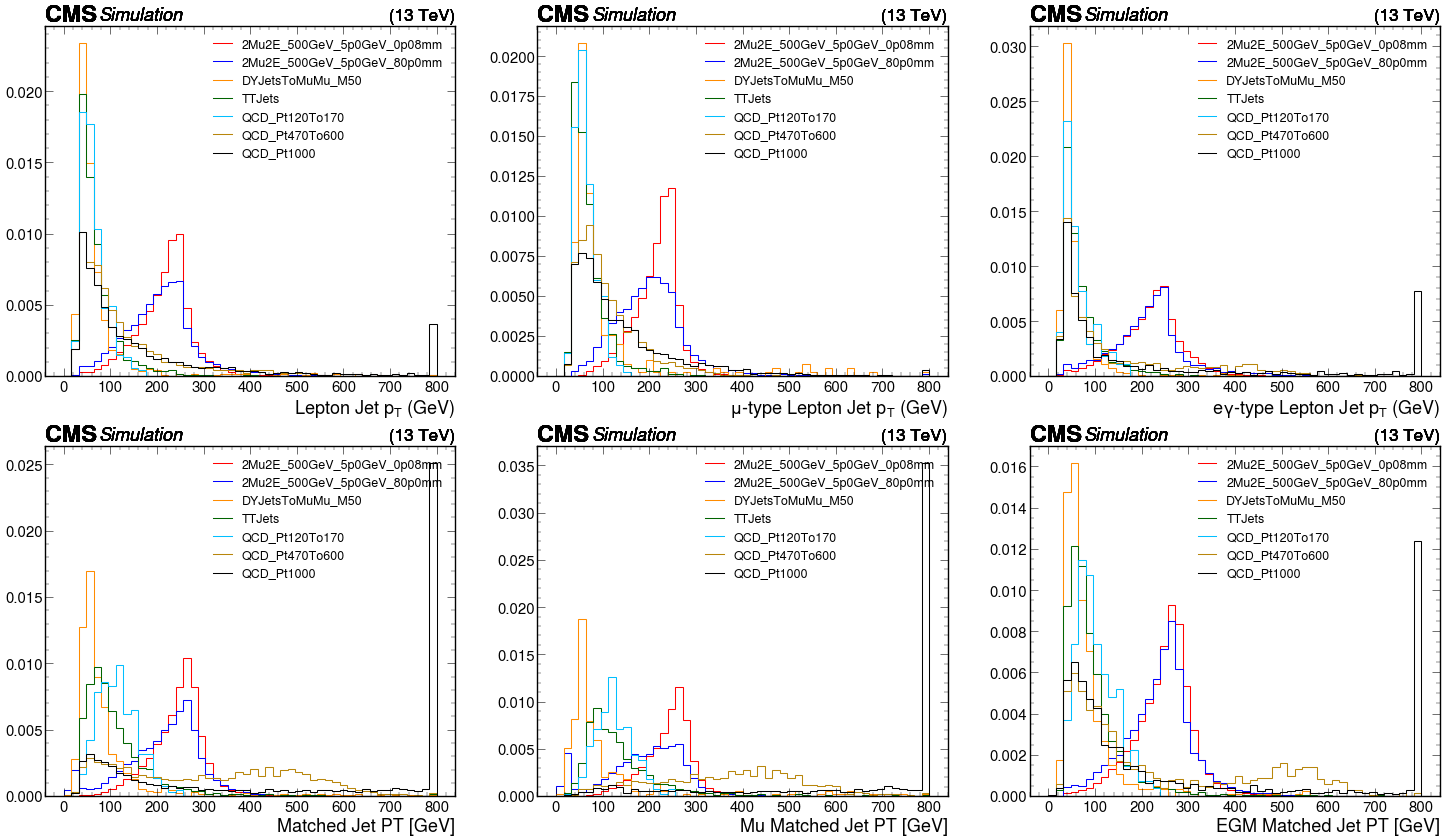

In [62]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

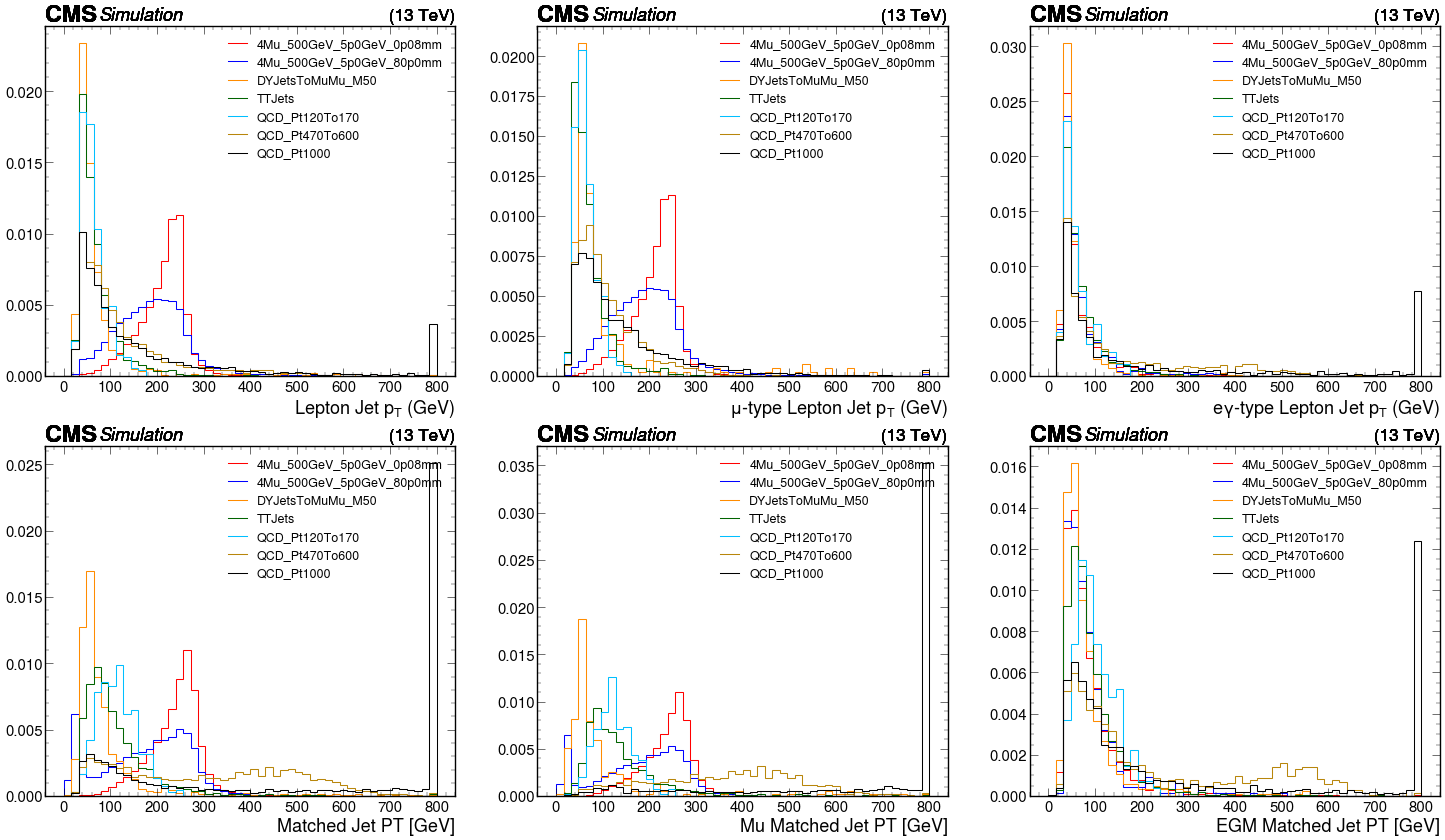

In [65]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_lj_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### For the signals, both lepton-jet and matched-jet have peaks where we expected them to be.
#### But, Mu type distribution of large decay length sample looks little bit weird to me.
#### The background has a different distribution than the signal (This should be a typical PF jet behavior).
#### On the EGM type of 4mu channel, signals also show a similar distribution to the background.
#### It makes sense because the 4mu channel doesn't have any EGM-type LJ. 
#### So basically lepton-jet and matched-jet are actually the same object except QCD_Pt1000. (Note that QCD_Pt1000 living on super high PT region)
#### Let's move on to more specific LJ categories

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

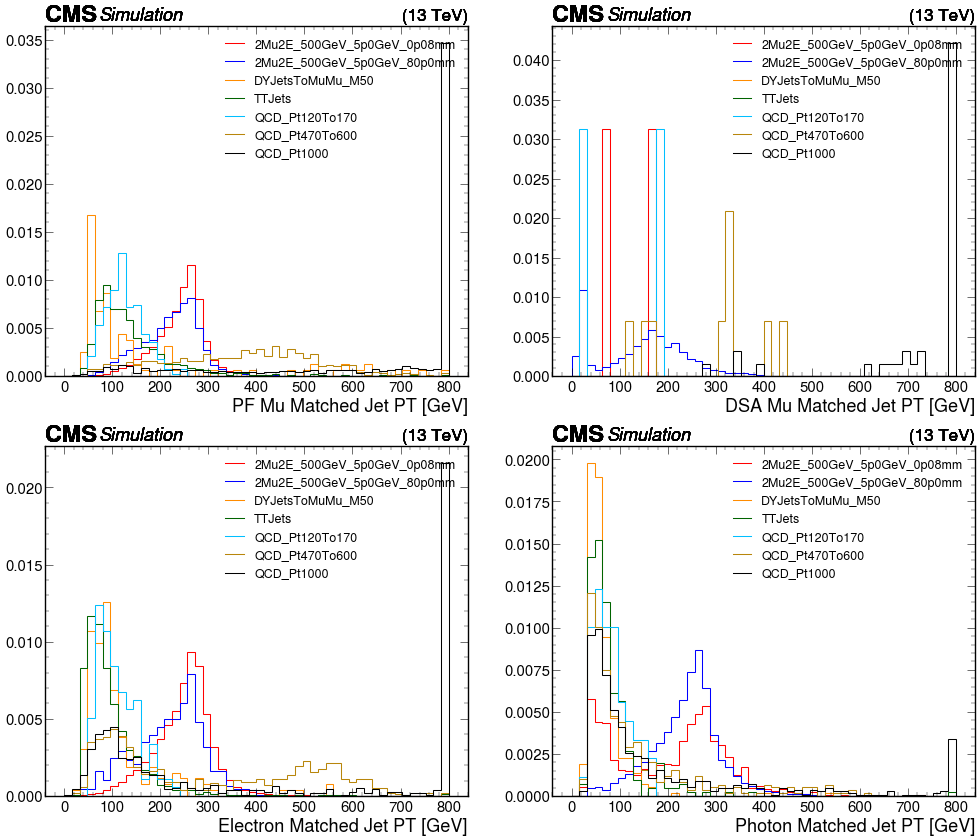

In [66]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

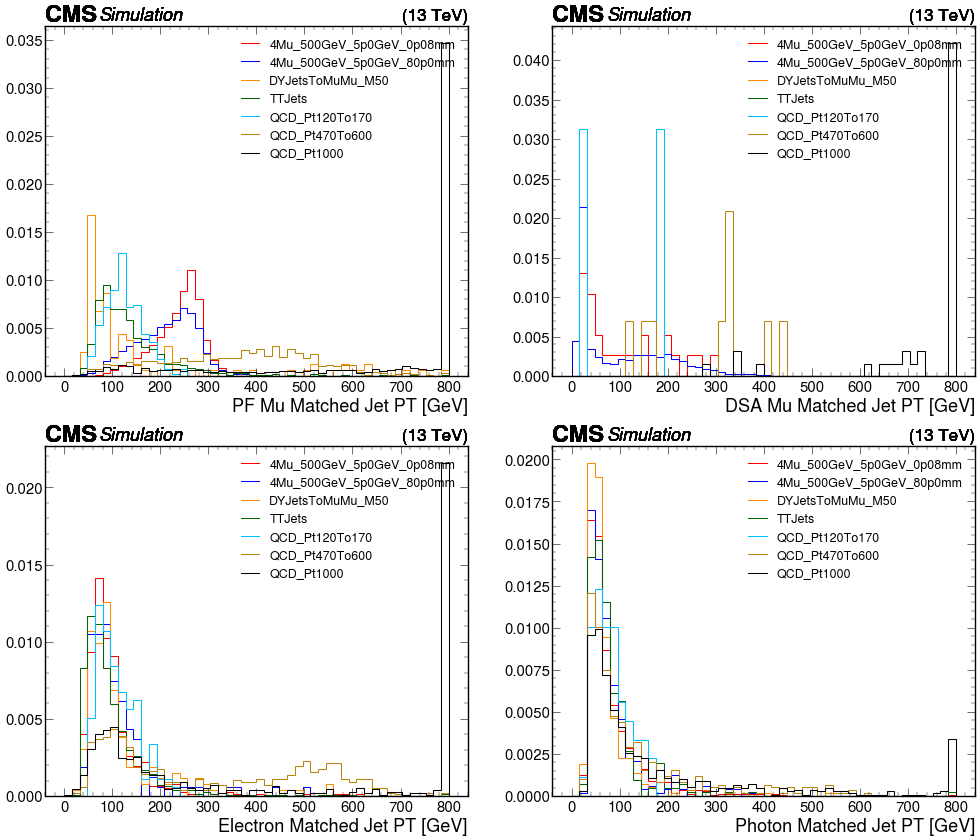

In [67]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Ah! So, basically weird distributions of Mu type comes from DSA Mu type!
#### DSA Mu type might not established well at this moment, so need to revisit someday.

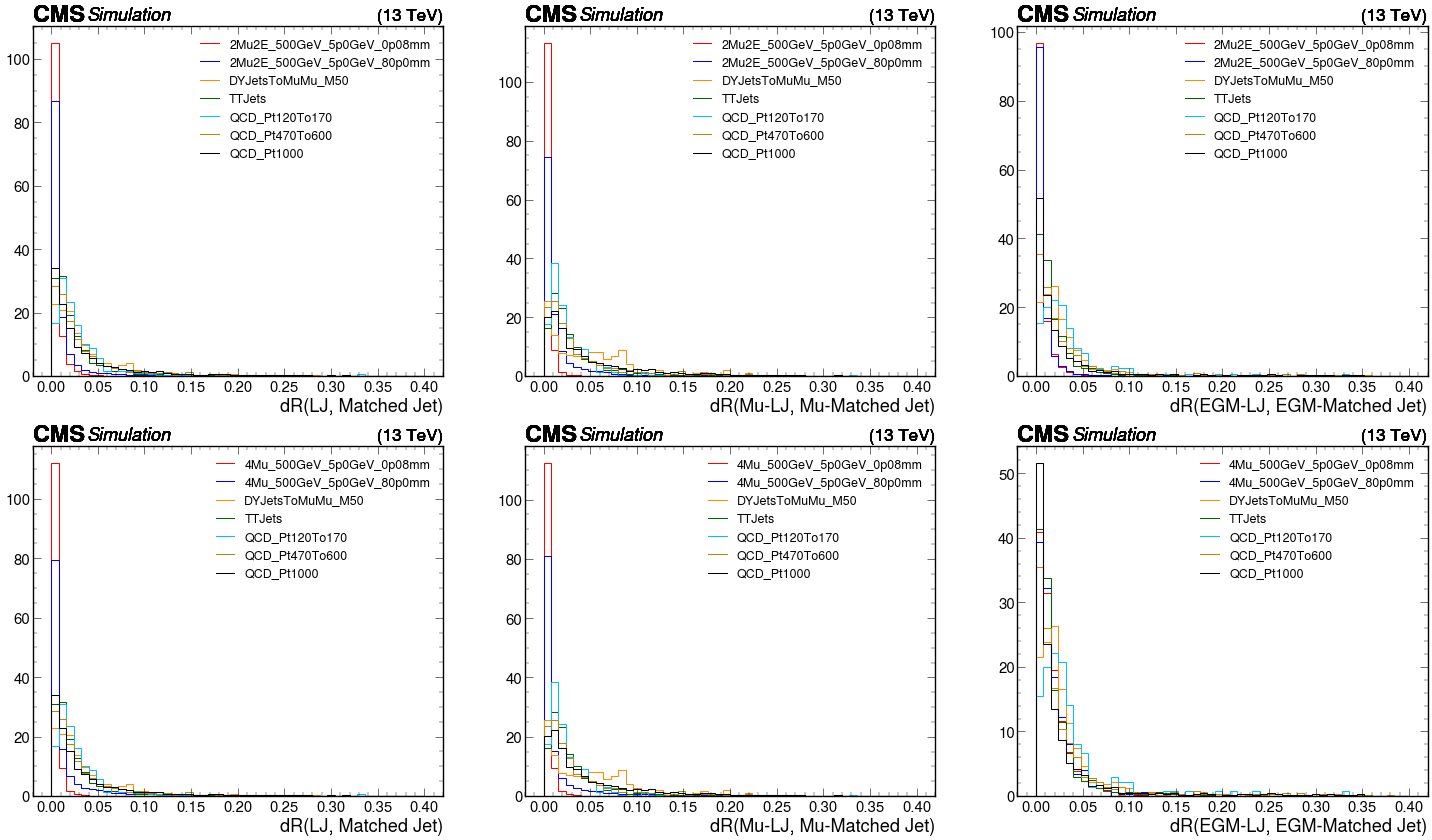

In [69]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Great! All the dR between lepton-jet and matched-jet satisfies the thereshold that was applied.
#### Most of the event living on first bin, which proved that matched-jet and lepton-jet are actually same object.
#### But, we have to think about why PT between LJ and Matched Jet have extremely different for QCD_Pt1000

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

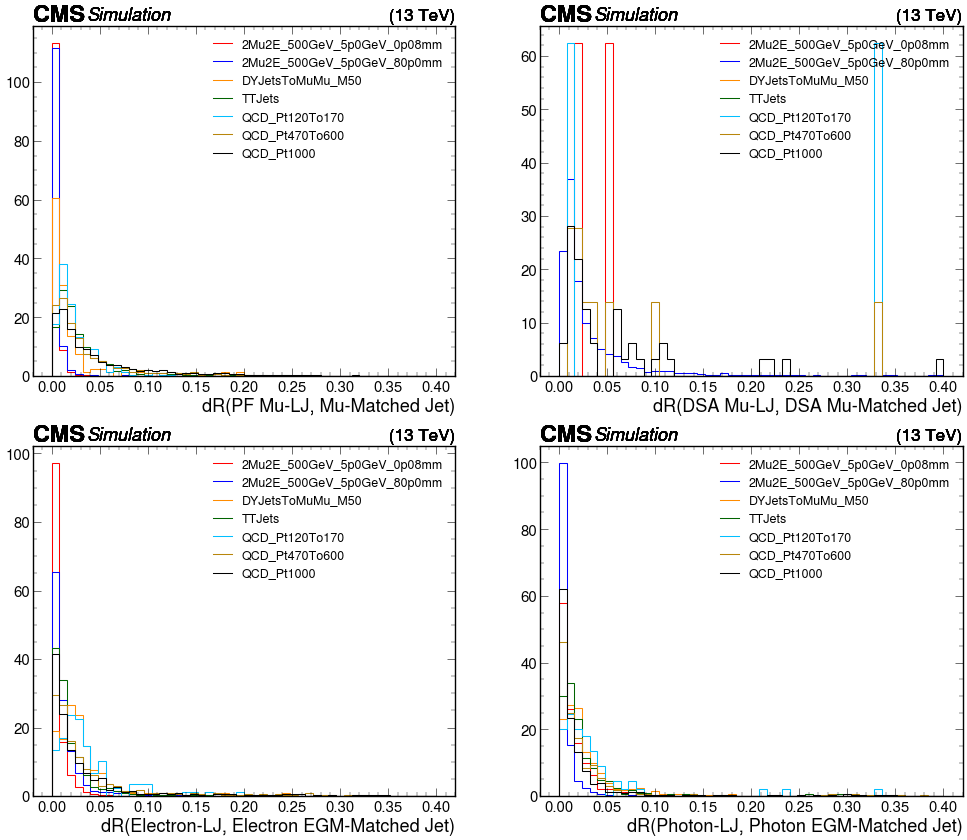

In [70]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

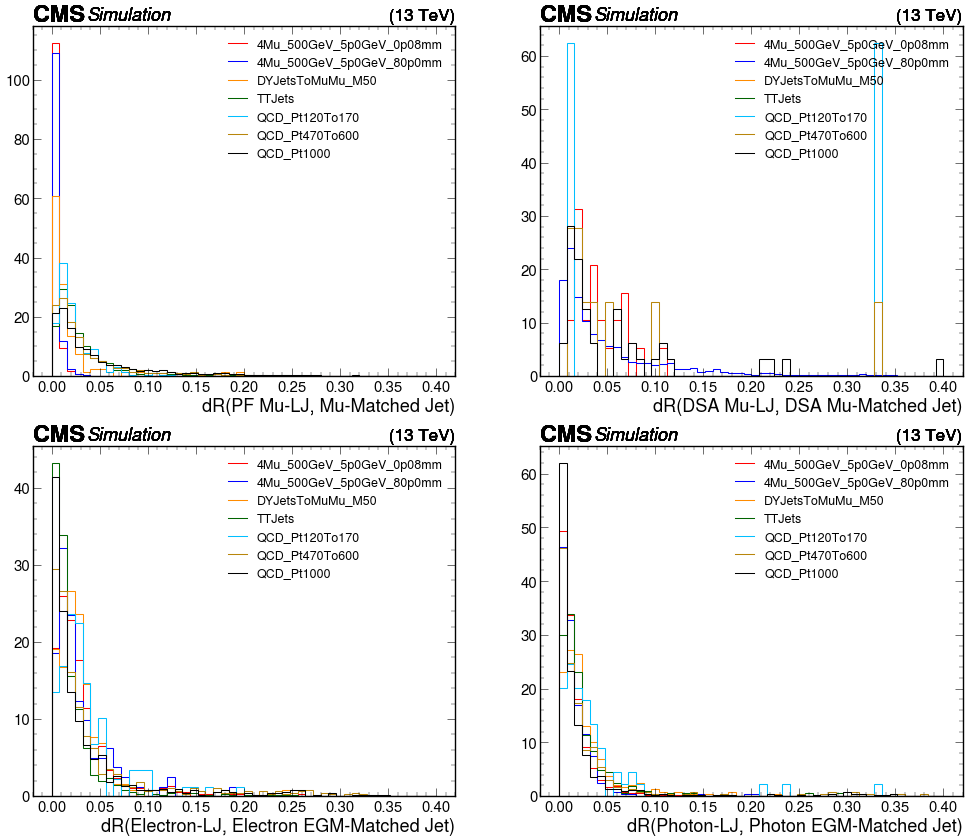

In [71]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lj_dR"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

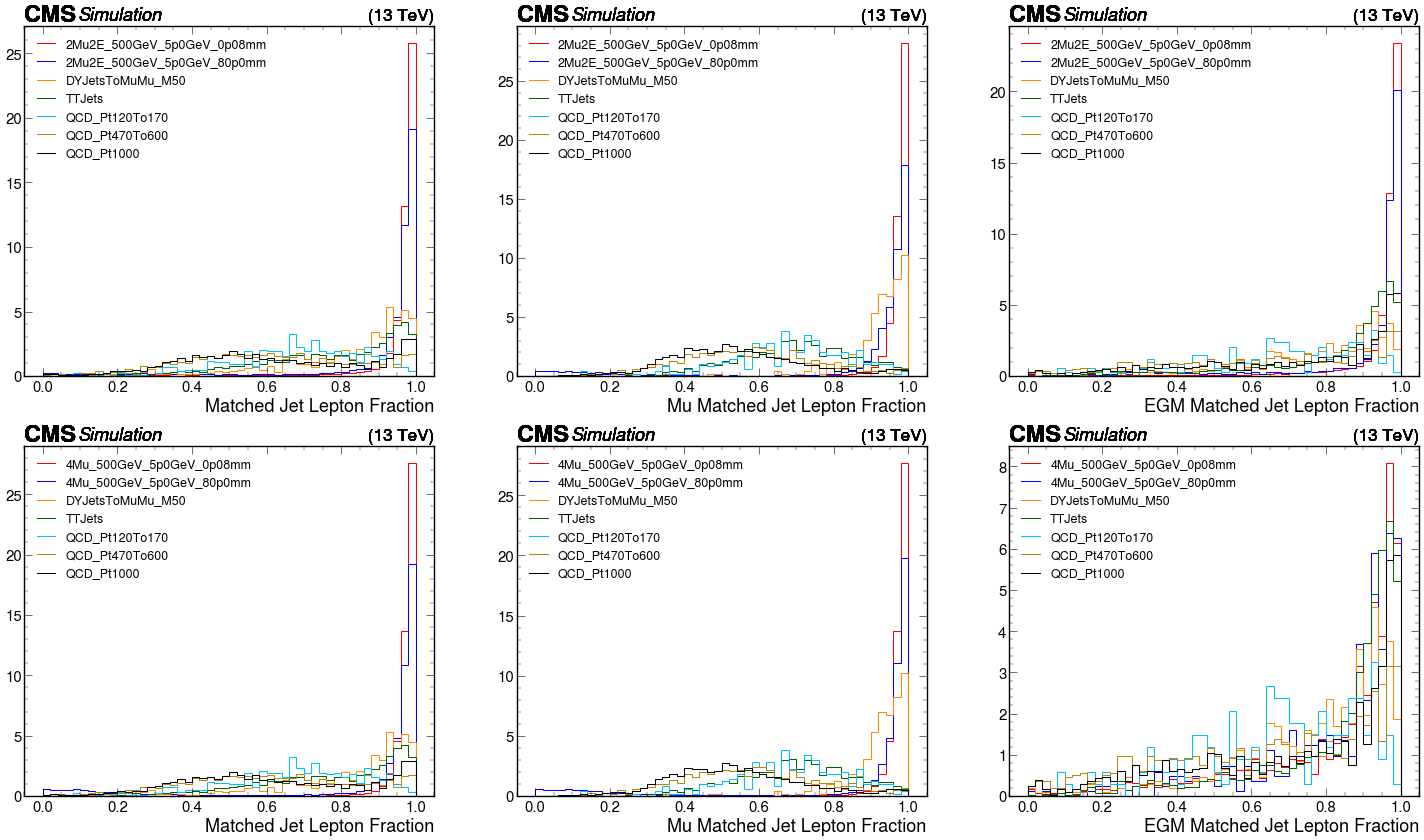

In [72]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### Let's revisit the definition of lepton-jet isolation. The critical term is (1 - Lepton Fraction of Matched Jet) part.
#### Basically, lepton fraction of matched jet is defined as (Charged Electromagnetic Energy Fraction + Neutral Electromagnetic Energy Fraction + Muon Energy Fraction)
#### Since final state of signal is fully leptonic, most of the events living close to 1.
#### On the other hand, background have relatively flat distribution.
#### Note that Mu type distribution is clearly have discriminating power except DYJets. We'll might utilize this feature for future ABCD method

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

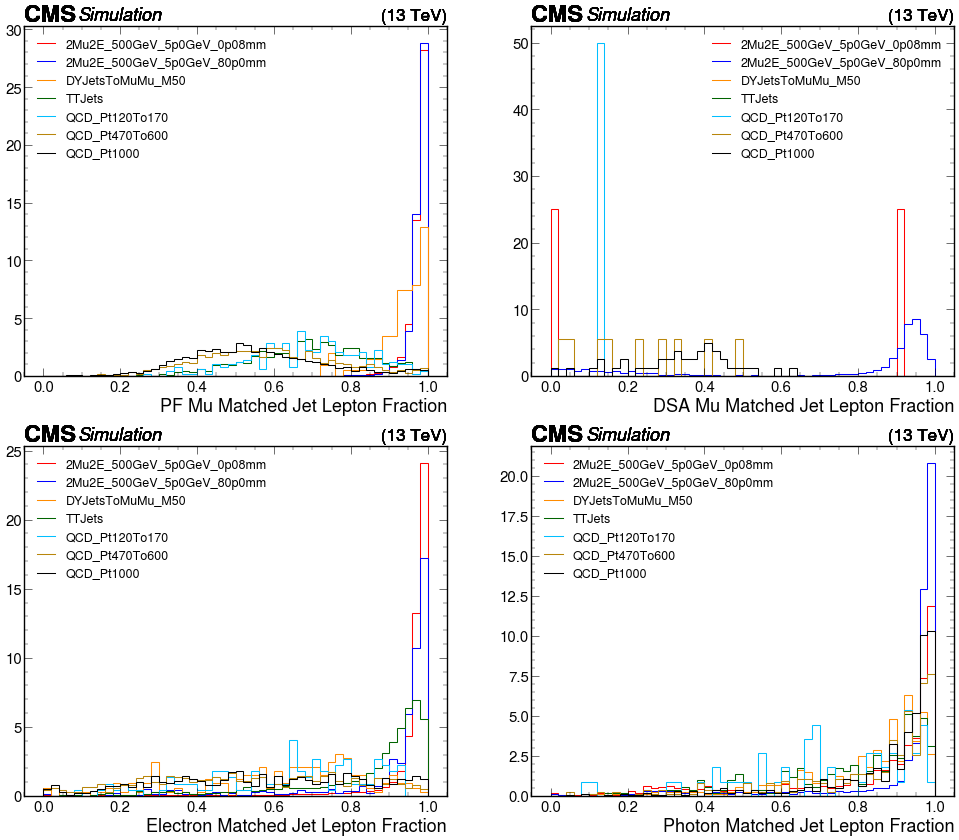

In [86]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values

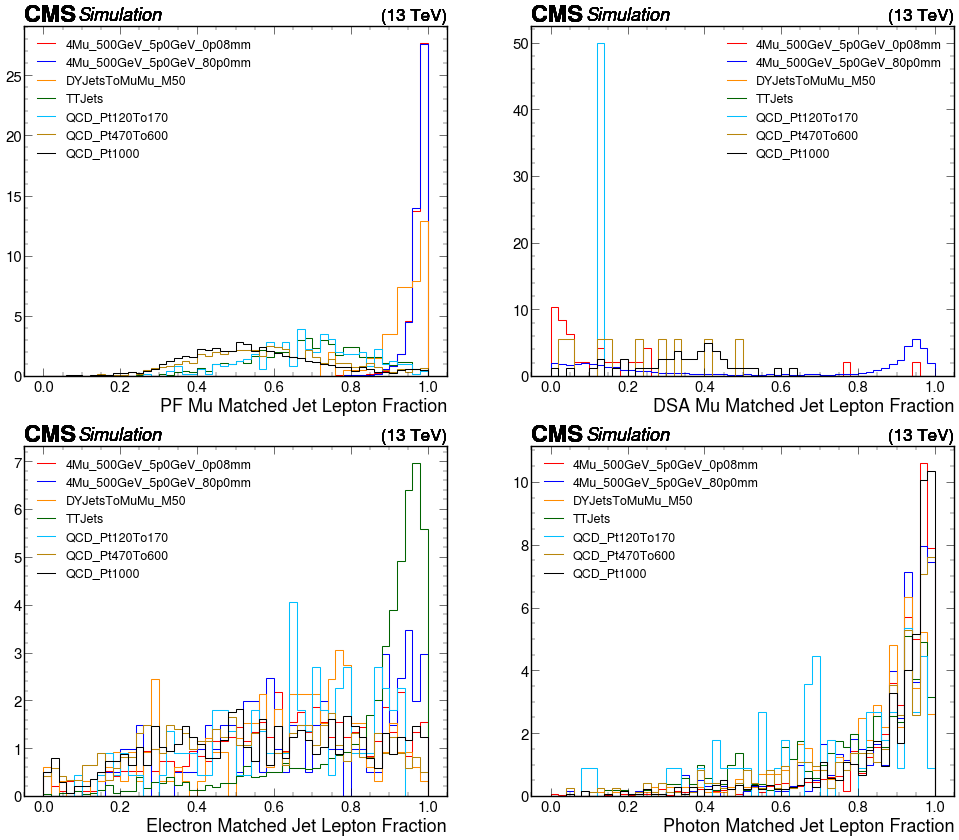

In [87]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["electron_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["photon_matched_jet_lepfraction"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### Nice! PF Mu type clearly have different distribution compare to signal except DYJet
#### Then, let's check on the lepton-jet isolation

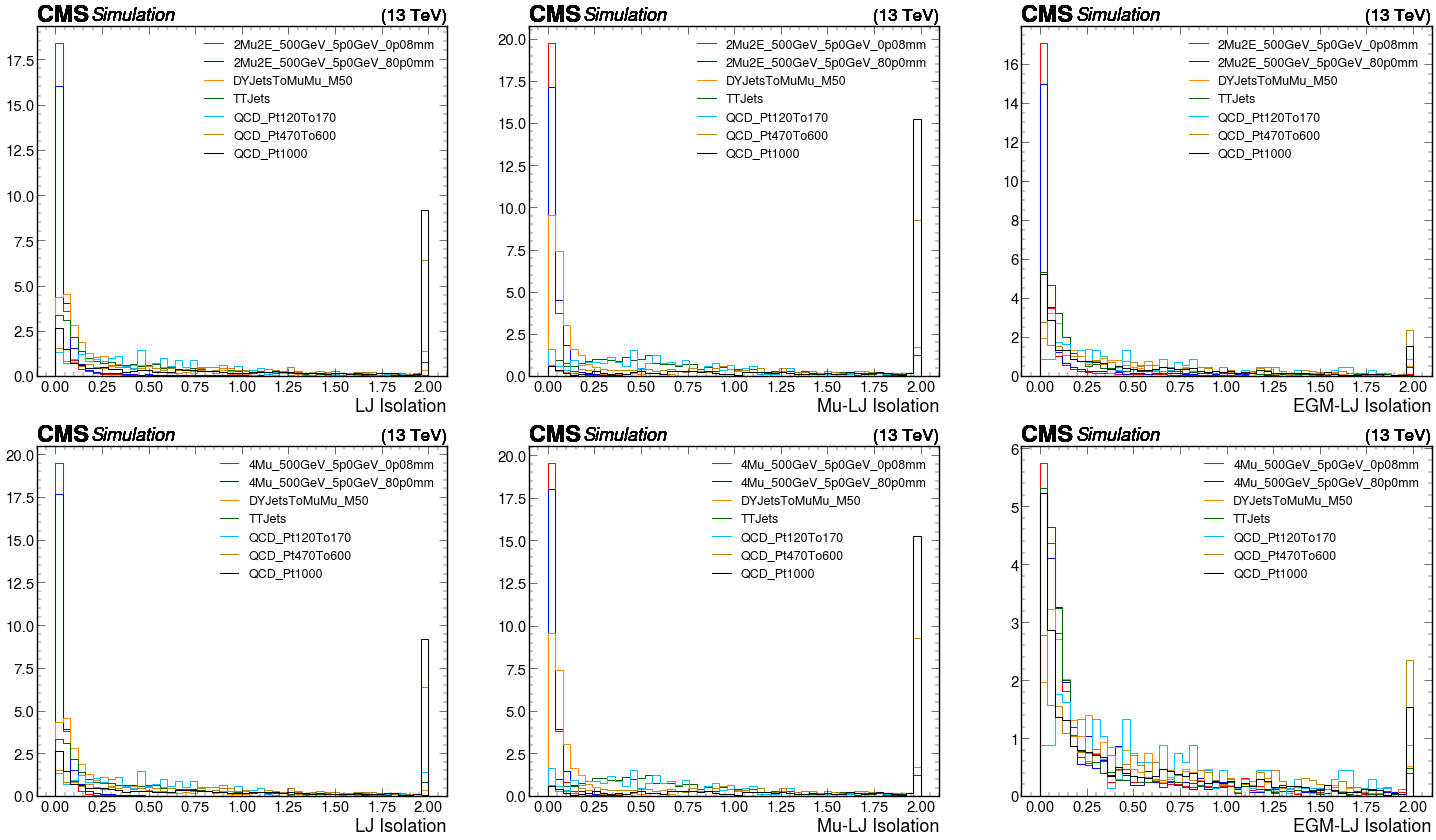

In [14]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Mu-LJ isolation looks promising!

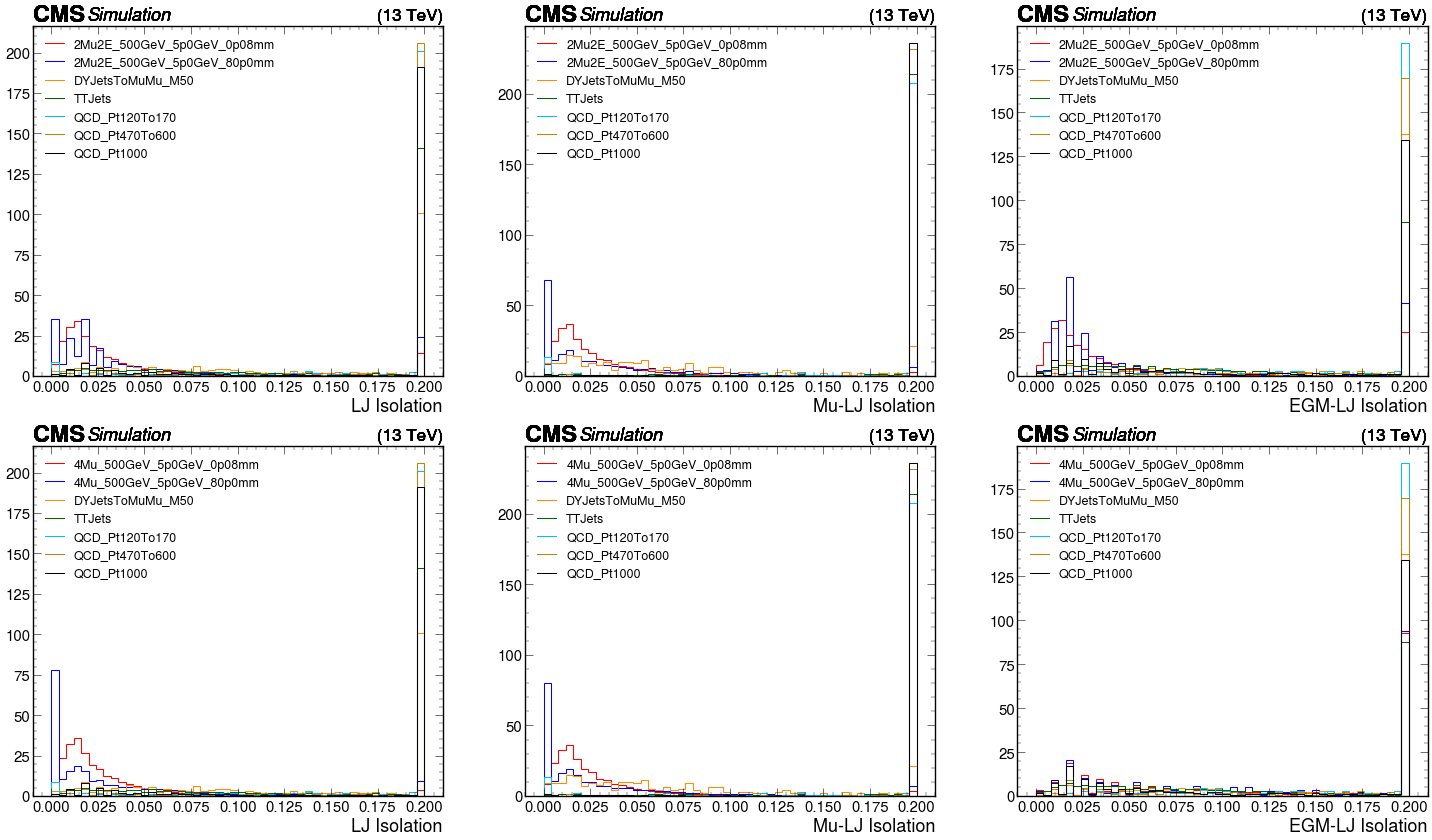

In [16]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,5)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,6)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["egm_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


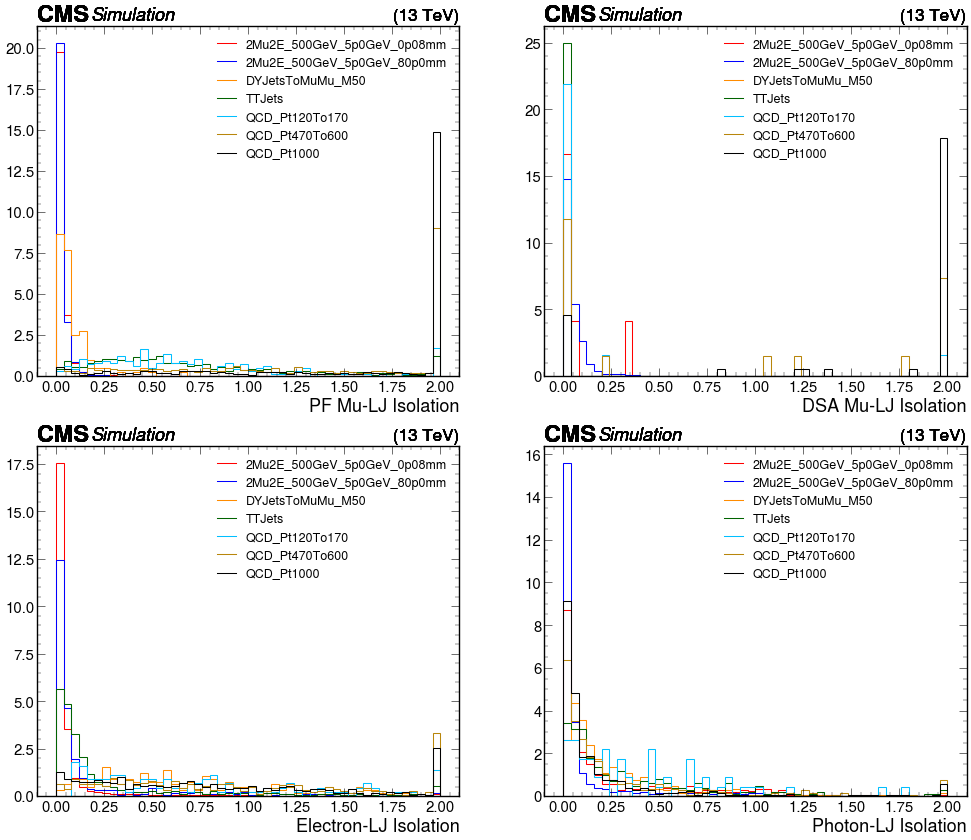

In [17]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


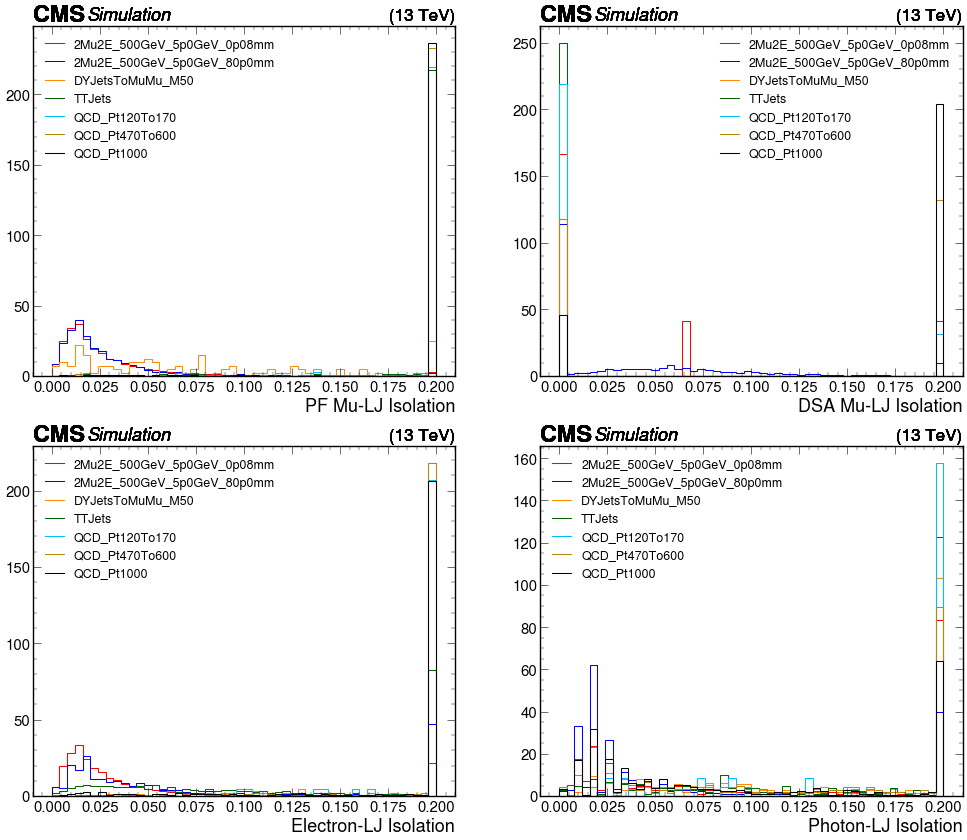

In [19]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["electron_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["photon_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


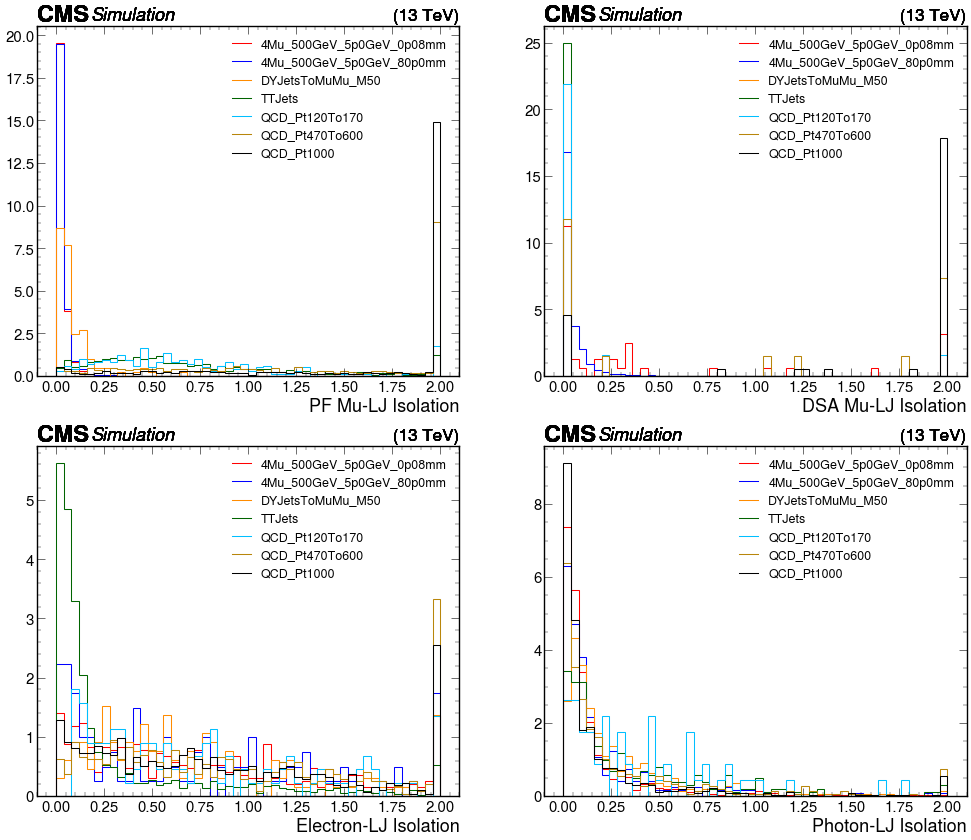

In [20]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["electron_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["photon_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

/usr/local/lib/python3.10/site-packages/mplhep/utils.py:486: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:560: RuntimeWarning: divide by zero encountered in scalar divide
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:531: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:532: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/usr/local/lib/python3.10/site-packages/mplhep/utils.py:533: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale


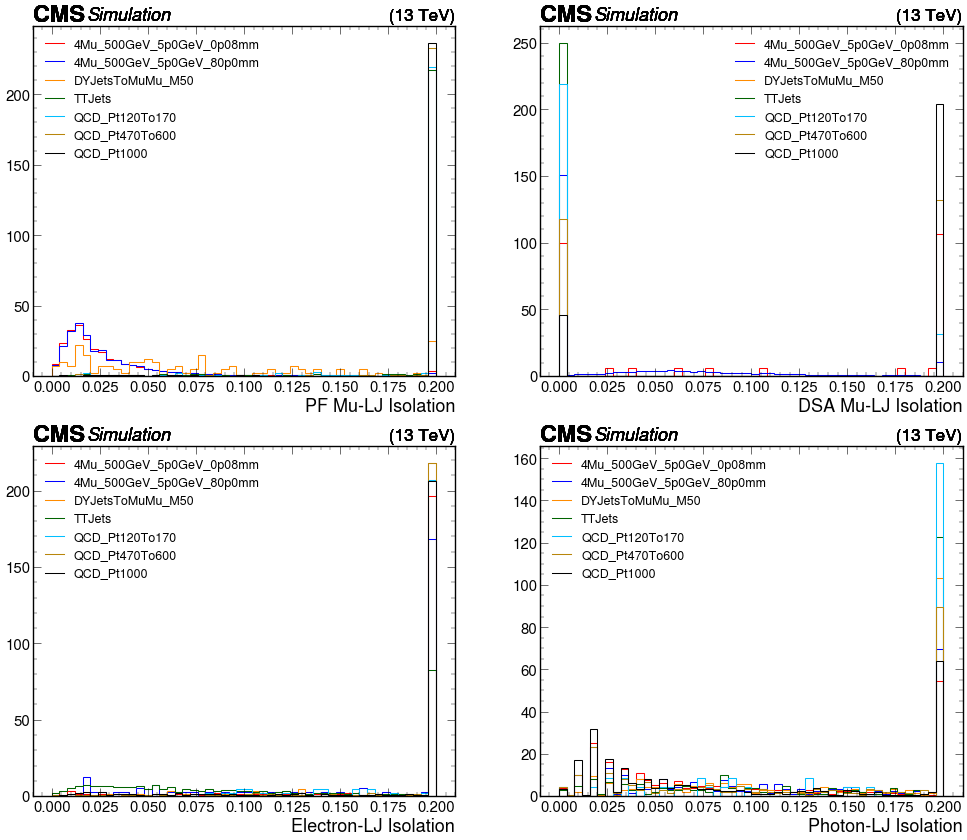

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["pfmu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["electron_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,2,4)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["photon_lj_isolation_zoom"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### PF Mu-LJ isolation show promising results that effectively separate signal and background.
#### We'll gonna select this value as ABCD value candidate.
#### But we also keep in our mind that Mu-LJ is not that powerful for DYJets

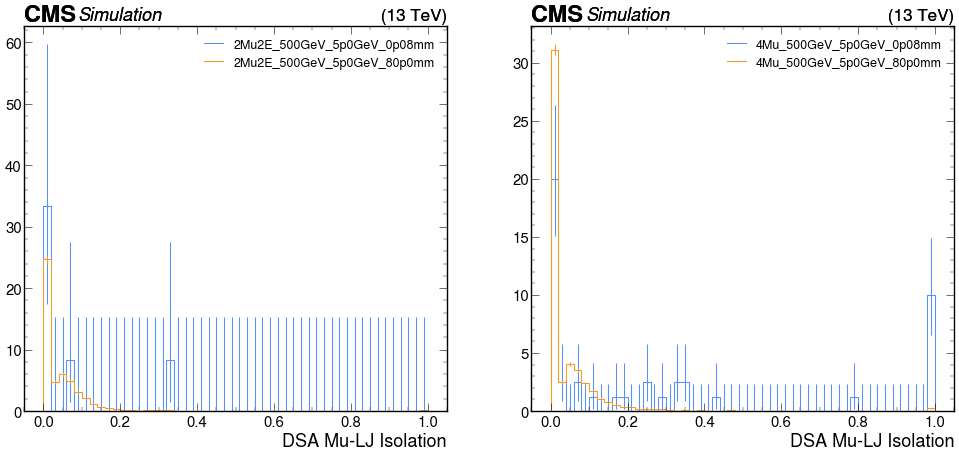

In [78]:
samples_2mu2e = [
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_500GeV_5p0GeV_80p0mm",
]

samples_4mu = [    
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_500GeV_5p0GeV_80p0mm",
]
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

In [20]:
samples_2mu2e = [
    "2Mu2E_100GeV_5p0GeV_0p4mm",
    "2Mu2E_150GeV_5p0GeV_0p27mm",
    "2Mu2E_200GeV_5p0GeV_0p2mm",
    "2Mu2E_500GeV_5p0GeV_0p08mm",
    "2Mu2E_800GeV_5p0GeV_0p05mm",
    "2Mu2E_1000GeV_5p0GeV_0p04mm",    
]

samples_4mu = [    
    "4Mu_100GeV_5p0GeV_0p4mm",
    "4Mu_150GeV_5p0GeV_0p27mm",
    "4Mu_200GeV_5p0GeV_0p2mm",
    "4Mu_500GeV_5p0GeV_0p08mm",
    "4Mu_800GeV_5p0GeV_0p05mm",
    "4Mu_1000GeV_5p0GeV_0p04mm",
]

#### Now, let's move on to dependency on bound state mass.
#### In order to get more clear vision of signals, I skipped the background sample here.

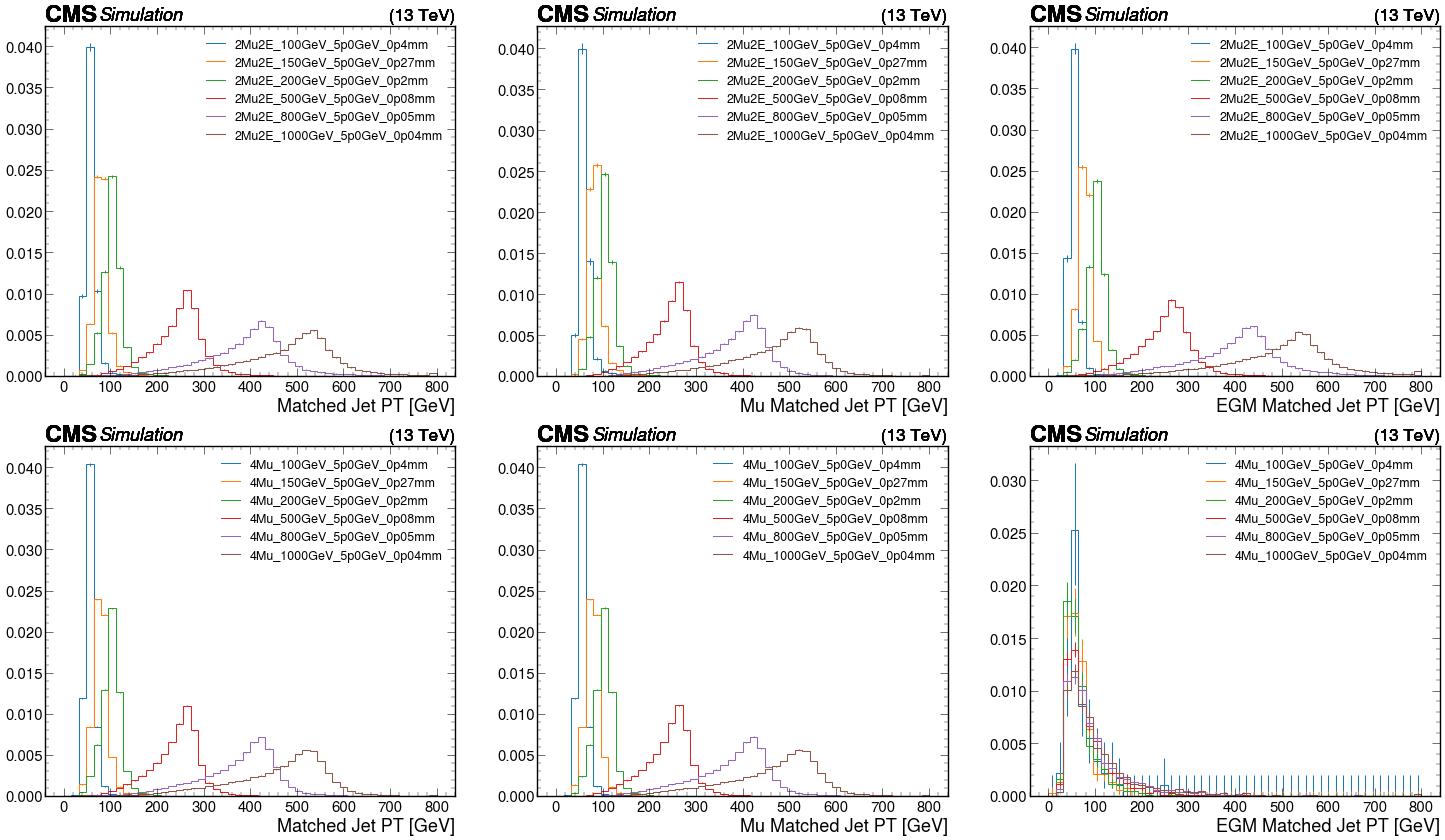

In [21]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### For all signal samples, the $p_{T}$ of the matched jet has a peak at half the bound state mass.
#### Note that 4Mu channel doesn't have EGM type, so EGM matched-jet show typical PF jet behavior.
#### Let's move on to categorized matched-jet

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

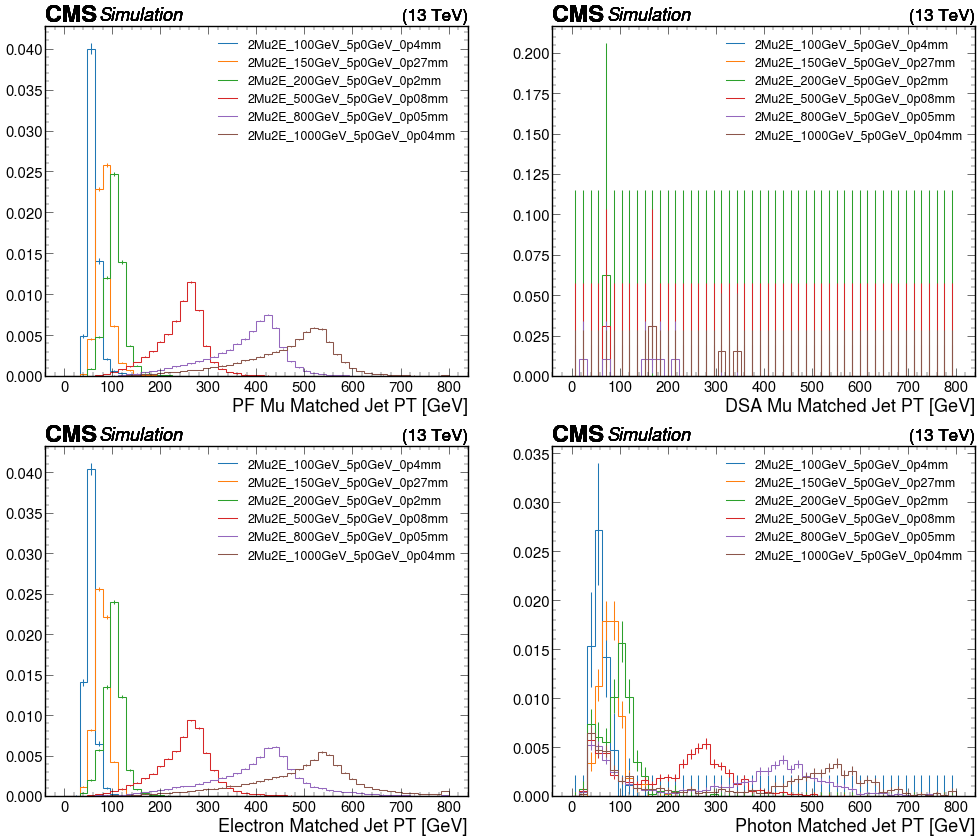

In [22]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

#### PF Muon and Electron looks clear.
#### Since I only use shortest decay length samples for all bound state, photon type have low statistics.

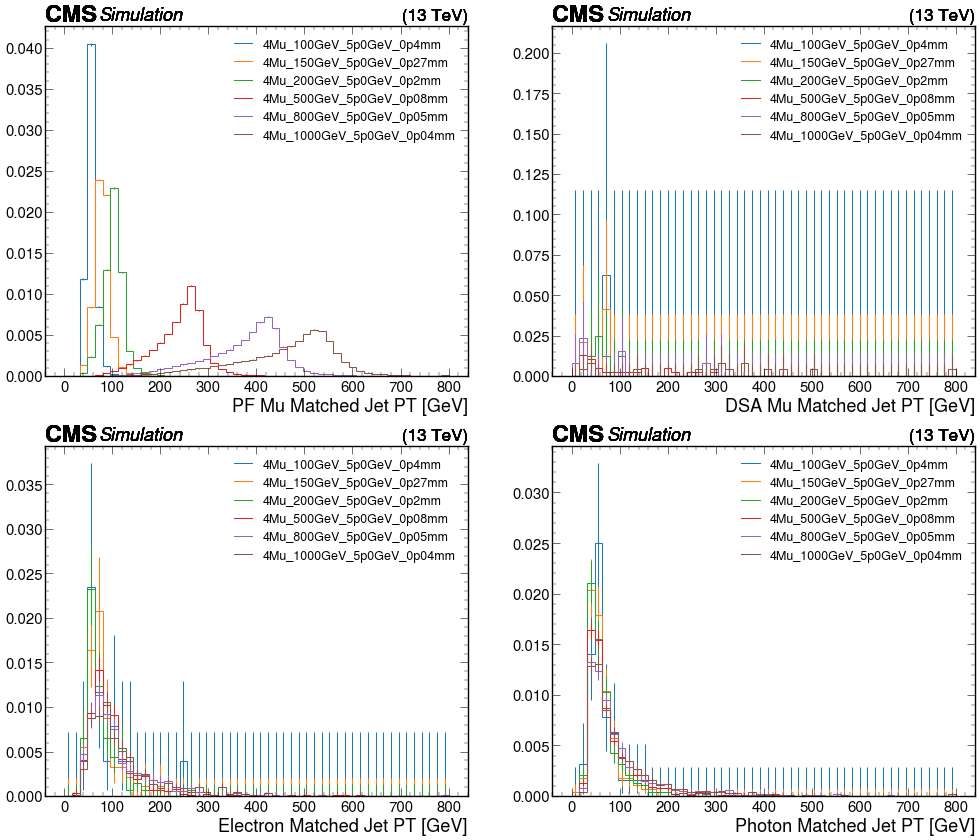

In [23]:
plt.subplots(2,2,figsize=(24,20))

plt.subplot(2,2,1)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["pfmu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,2)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["dsamu_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,3)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["electron_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,2,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["photon_matched_jet_pt"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Okay, let's ignore the electron and photon type because it's 4Mu samples.
#### And PF Mu distribution looks perfect.

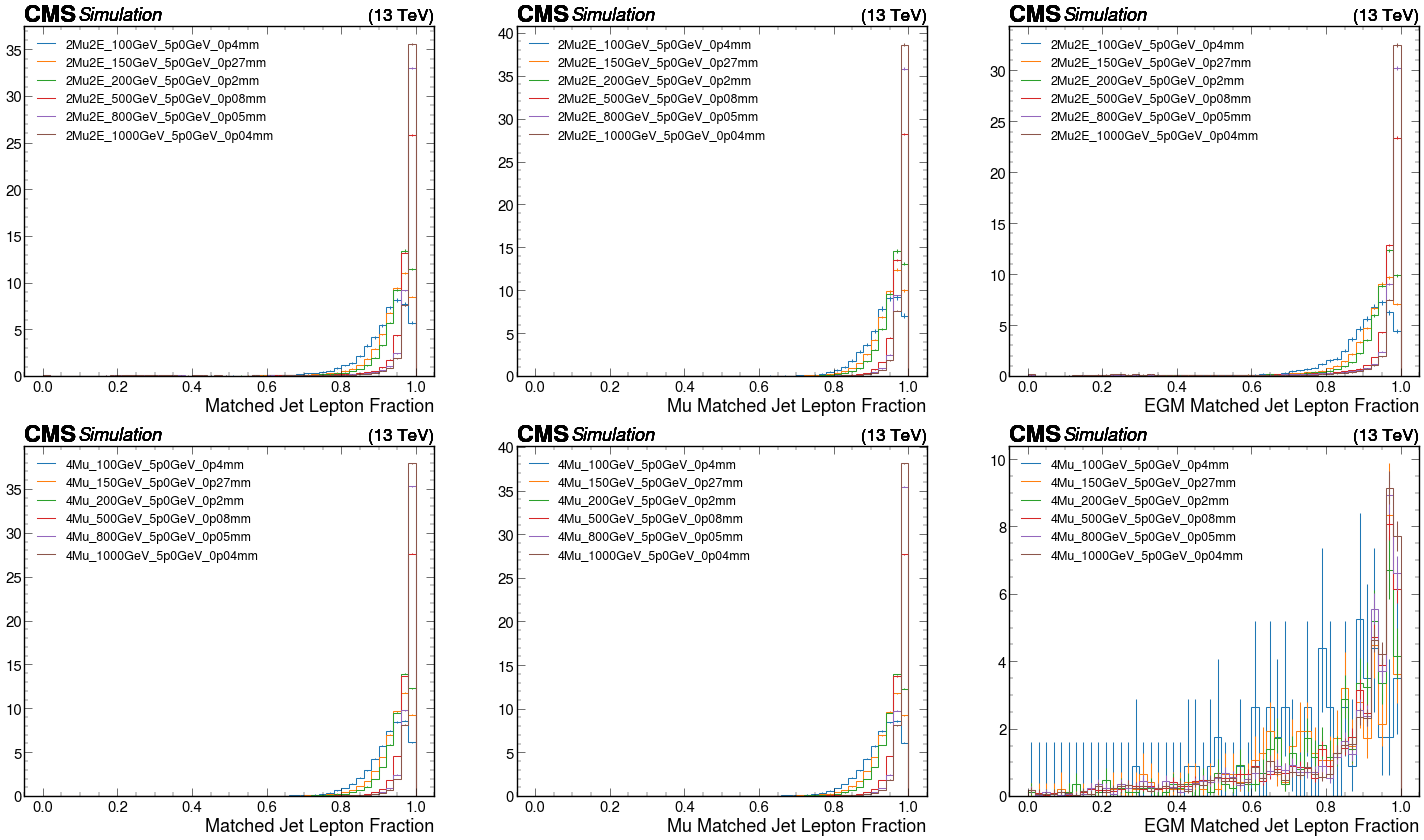

In [24]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=2, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_matched_jet_lepfraction"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=2, prop={'size': 18})

#### All the signal show clean peak at 1 on lepton fraction.
#### One thing I notice that the lower the bound state mass, the flatter it tends to be.

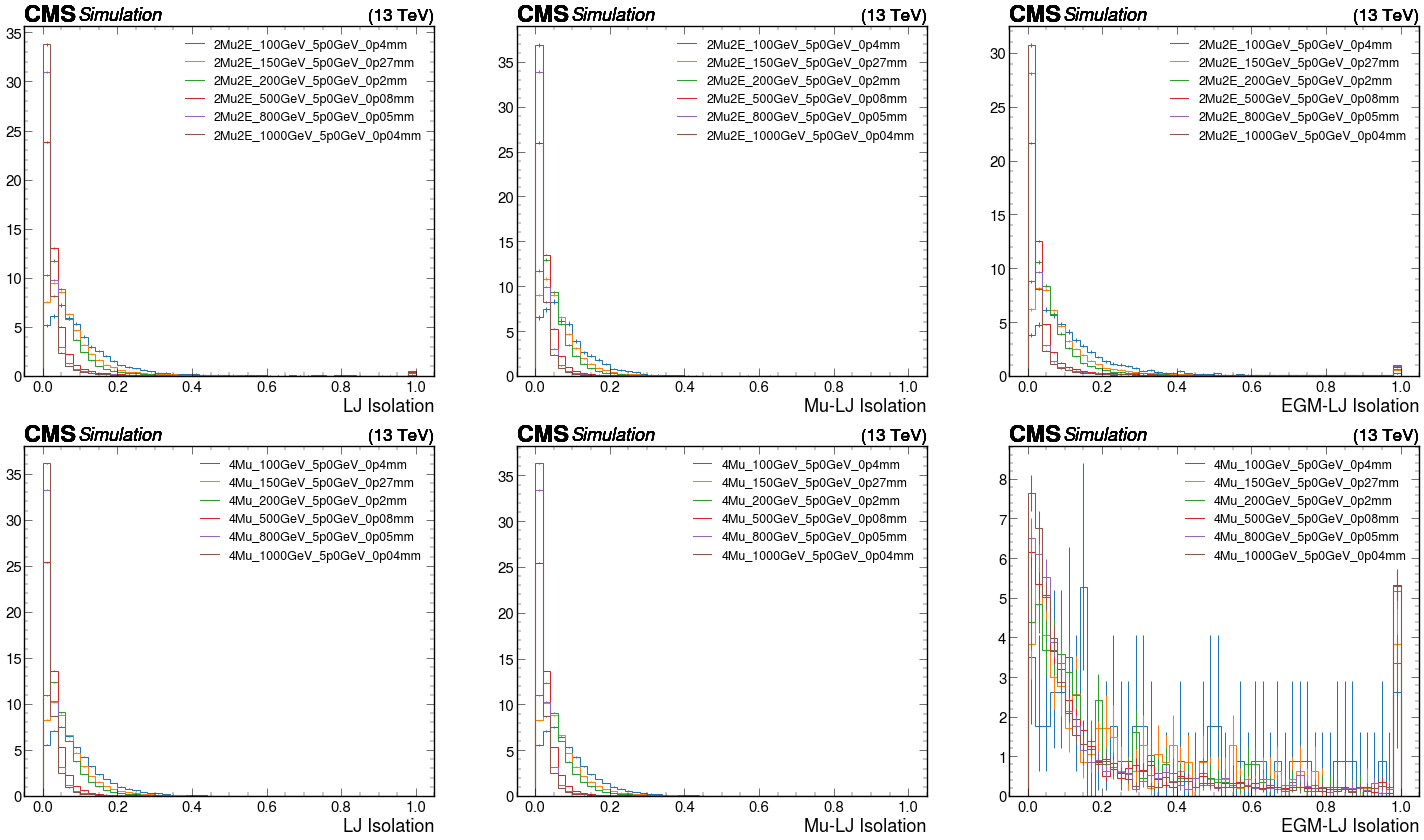

In [25]:
plt.subplots(2,3,figsize=(36,20))

plt.subplot(2,3,1)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,2)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,3)
for sample in samples_2mu2e:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(2,3,4)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,5)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(2,3,6)
for sample in samples_4mu:
    utilities.plot(out[sample]["hists"]["egm_lj_isolation"][channels[0], :], density=True)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Same here. If the bound state mass is high, it will peak cleanly at zero.
#### For the lowest bound state, you can see that the position of the peak is different.
#### What makes this difference? Need to discuss

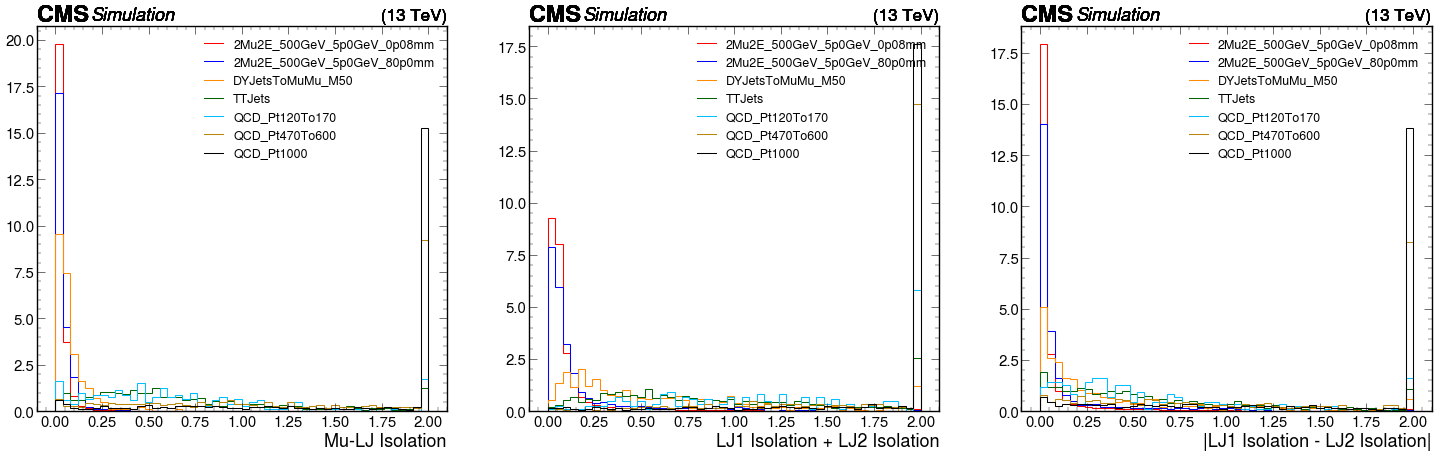

In [82]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_isolation_sum"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["dlj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

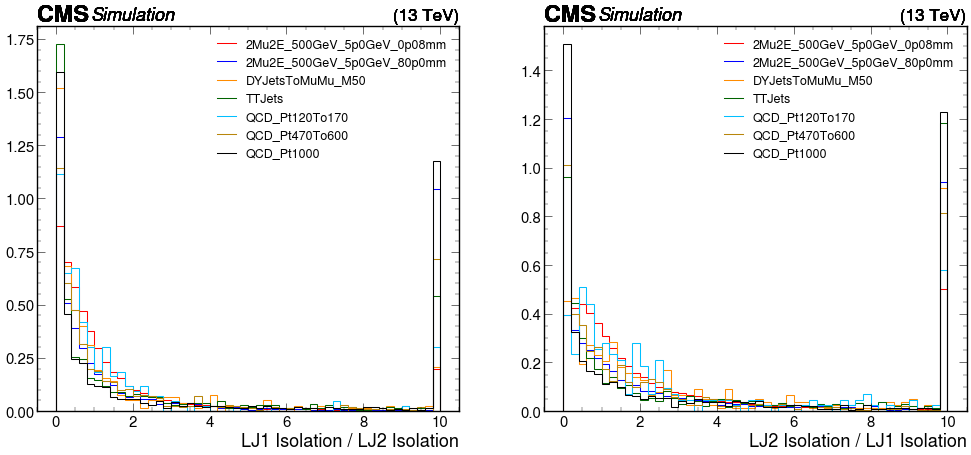

In [84]:
plt.subplots(1,2,figsize=(24,10))

plt.subplot(1,2,1)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_isolation_ratio1"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

plt.subplot(1,2,2)
for i, sample in enumerate(samples_2mu2e):
    utilities.plot(out[sample]["hists"]["lj_isolation_ratio2"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_2mu2e, loc=1, prop={'size': 18})

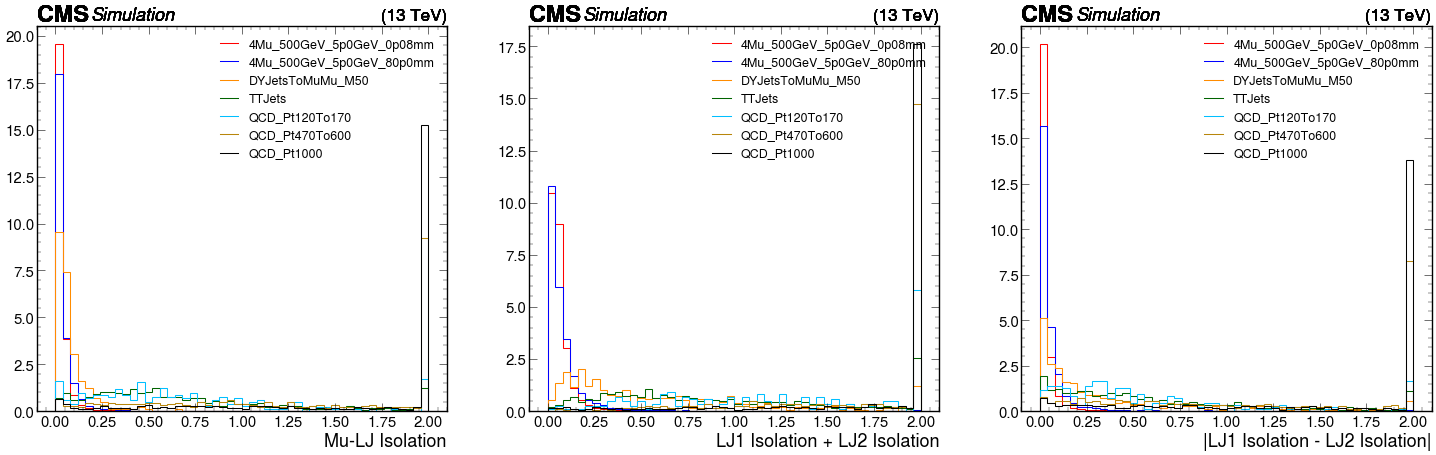

In [85]:
plt.subplots(1,3,figsize=(36,10))

plt.subplot(1,3,1)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["mu_lj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,2)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["lj_isolation_sum"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

plt.subplot(1,3,3)
for i, sample in enumerate(samples_4mu):
    utilities.plot(out[sample]["hists"]["dlj_isolation"][channels[0], :], density=True, color=colors[i], yerr=False)
plt.legend(samples_4mu, loc=1, prop={'size': 18})

#### Few variable test using isolation
#### LJ1 iso + LJ2 iso might interesting because it have discriminate power between signal and DYJets